<a href="https://colab.research.google.com/github/fkrabdillah17/JST/blob/main/IrisClassification/MLP_IrisClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

from sklearn.metrics import classification_report, confusion_matrix

plt.style.use('ggplot')

In [5]:
#Load Dataset
df = pd.read_csv("/content/drive/MyDrive/JST-TugasKe-2/IrisClassification/IRIS.csv")

In [6]:
#Menampilkan sebagian dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#Deskripsi Dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


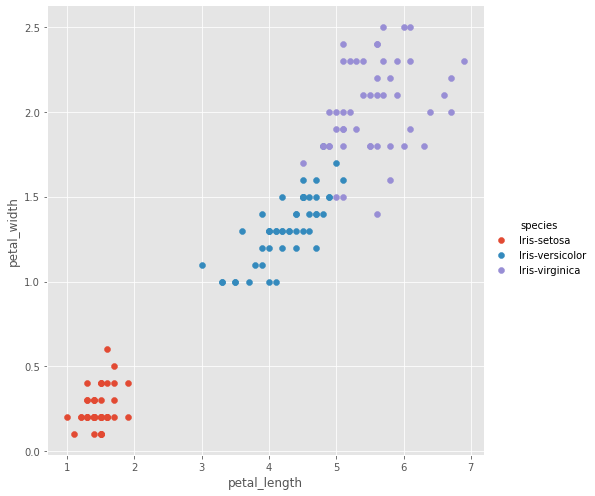

In [9]:
#visualisasi fitur dataset
sns.FacetGrid(df, hue="species", size=7) \
   .map(plt.scatter, "petal_length", "petal_width") \
   .add_legend()
#fitur sudah terpisah secara linear

In [10]:
data_x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
data_y = df['species']
df_no_scale = data_x

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
data_x_scale = scaler.fit_transform(data_x.values)
df_scale = pd.DataFrame(data_x_scale, index = data_x.index, columns = data_x.columns)

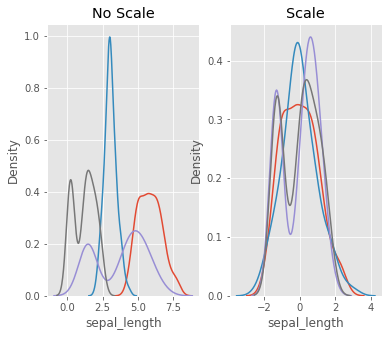

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('No Scale')
sns.kdeplot(df_no_scale['sepal_length'], ax=ax1)
sns.kdeplot(df_no_scale['sepal_width'], ax=ax1)
sns.kdeplot(df_no_scale['petal_length'], ax=ax1)
sns.kdeplot(df_no_scale['petal_width'], ax=ax1)

ax2.set_title('Scale')
sns.kdeplot(df_scale['sepal_length'], ax=ax2)
sns.kdeplot(df_scale['sepal_width'], ax=ax2)
sns.kdeplot(df_scale['petal_length'], ax=ax2)
sns.kdeplot(df_scale['petal_width'], ax=ax2)

plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_scale.values, data_y, test_size = 0.33, random_state=42)

In [15]:
X_train, X_test, y_train, y_test

(array([[-1.73673948e-01, -3.56360566e-01,  2.50967307e-01,
          1.33225943e-01],
        [ 2.12851559e+00, -1.24957601e-01,  1.61574420e+00,
          1.18500970e+00],
        [-2.94841818e-01, -1.24957601e-01,  4.21564419e-01,
          3.96171883e-01],
        [-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
         -1.31297673e+00],
        [ 2.24968346e+00, -5.87763531e-01,  1.67260991e+00,
          1.05353673e+00],
        [-5.25060772e-02, -8.19166497e-01,  1.94101603e-01,
         -2.61192967e-01],
        [-7.79513300e-01,  8.00654259e-01, -1.34127240e+00,
         -1.31297673e+00],
        [-1.02184904e+00,  1.03205722e+00, -1.39813811e+00,
         -1.18150376e+00],
        [-9.00681170e-01,  1.72626612e+00, -1.05694388e+00,
         -1.05003079e+00],
        [-1.02184904e+00, -2.43898725e+00, -1.47092621e-01,
         -2.61192967e-01],
        [ 5.53333275e-01, -8.19166497e-01,  6.49027235e-01,
          7.90590793e-01],
        [-1.26418478e+00,  8.00654259e-01, 

In [17]:
#label encode
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
y_train = label.fit_transform(y_train)
y_test = label.fit_transform(y_test)

In [28]:
from tensorflow.keras import utils as np_utils
y_train = np_utils.to_categorical(y_train, num_classes = 3)
y_test = np_utils.to_categorical(y_test, num_classes = 3)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100, 4)
(50, 4)
(100, 3)
(50, 3)


In [31]:
#Model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=4))
model.add(Dense(3, activation='softmax'))
sgd = SGD(learning_rate = 0.01, decay = 1e-6, momentum = 0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
history = model.fit(X_train, y_train, epochs = 300, batch_size = 32)

Epoch 1/300
4/4 [==============================] - 0s 3ms/step - loss: 0.0435 - accuracy: 0.9900
Epoch 2/300
4/4 [==============================] - 0s 3ms/step - loss: 0.0434 - accuracy: 0.9900
Epoch 3/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9900
Epoch 4/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9900
Epoch 5/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.9900
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 0.0428 - accuracy: 0.9900
Epoch 7/300
4/4 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9900
Epoch 8/300
4/4 [==============================] - 0s 3ms/step - loss: 0.0446 - accuracy: 0.9900
Epoch 9/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 0.9900
Epoch 10/300
4/4 [==============================] - 0s 3ms/step - loss: 0.0439 - accuracy: 0.9900
Epoch 11/300
4/4 [===========

In [34]:
#Evaluasi
score = model.evaluate(X_test, y_test, verbose = 0)

In [35]:
#Nilai Evaluasi Model
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.04659465327858925
Test accuracy: 0.9800000190734863


In [36]:
#Predict
y_pred = model.predict(X_test)

In [37]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


In [38]:
df_result = pd.DataFrame.from_dict(history.history)

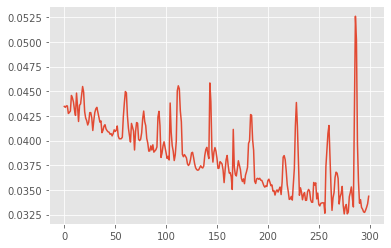

In [41]:
df_result['loss'].plot()

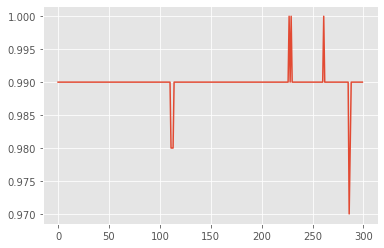

In [45]:
df_result['accuracy'].plot()